In [1]:
import sys
sys.path.insert(0, '/home/dang/ml-from-scratch')

In [2]:
import numpy as np
from sklearn.datasets import make_blobs

import matplotlib.lines as mlines
import matplotlib.pyplot as plt

from src.models.svm import SVMSoftMargin

plt.style.use('ggplot')

# Generate data

In [3]:
centers = [(-20, -100), (300, 600)]
cluster_std = [150, 175]

X, y = make_blobs(n_samples=400, cluster_std=cluster_std, centers=centers, n_features=2, random_state=1)
y[y == 0] = -1

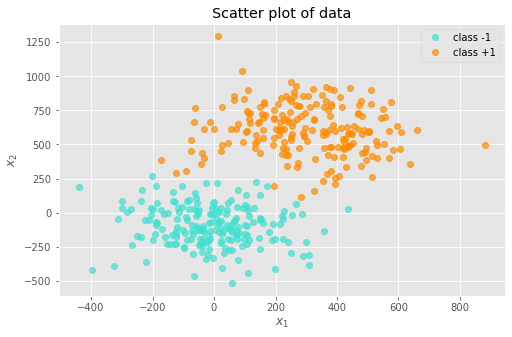

In [4]:
X0 = X[np.where(y == -1)]
X1 = X[np.where(y == 1)]
plt.figure(figsize=(8,5))
plt.plot(X0[:, 0], X0[:, 1], 'o', color='turquoise', alpha=0.7, label='class -1')
plt.plot(X1[:, 0], X1[:, 1], 'o', color='darkorange', alpha=0.7, label='class +1')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Scatter plot of data')
plt.legend()
plt.show()

# Train SVM

In [10]:
C = 1e-5
classifier = SVMSoftMargin()
classifier.train(X, y, C)
weights = classifier._w
bias = classifier._b
print(f'weights: {weights}')
print(f'bias: {bias}')

weights: [0.00292939 0.00850364]
bias: -2.165331384204823


In [6]:
# functions to compute x1 given x2
def compute_x1(x2, weights, bias):
    return (-weights[1] * x2 - bias)/weights[0]

def compute_x1_left(x2, weights, bias):
    return (-weights[1] * x2 - bias - 1)/weights[0]

def compute_x1_right(x2, weights, bias):
    return (-weights[1] * x2 - bias + 1)/weights[0]

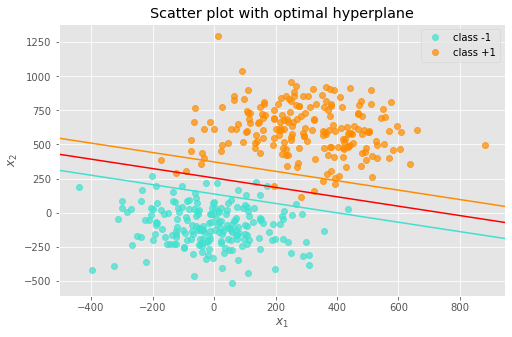

In [11]:
plt.figure(figsize=(8,5))
ax = plt.subplot()
ax.plot(X0[:, 0], X0[:, 1], 'o', color='turquoise', alpha=0.7, label='class -1')
ax.plot(X1[:, 0], X1[:, 1], 'o', color='darkorange', alpha=0.7, label='class +1')

x2_min, x2_max = ax.get_ybound()
x1_min = compute_x1(x2_min, weights, bias)
x1_max = compute_x1(x2_max, weights, bias)
x1_min_left = compute_x1_left(x2_min, weights, bias)
x1_max_left = compute_x1_left(x2_max, weights, bias)
x1_min_right = compute_x1_right(x2_min, weights, bias)
x1_max_right = compute_x1_right(x2_max, weights, bias)

center_line = mlines.Line2D([x1_min,x1_max], [x2_min, x2_max], color='red')
left_line = mlines.Line2D([x1_min_left,x1_max_left], [x2_min, x2_max], color='turquoise')
right_line = mlines.Line2D([x1_min_right,x1_max_right], [x2_min, x2_max], color='darkorange')
ax.add_line(center_line)
ax.add_line(left_line)
ax.add_line(right_line)
plt.title('Scatter plot with optimal hyperplane')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend()
plt.show()

# Predict some datapoints

In [12]:
X_new = np.array([[300, 300], [150, 200]])
y_new = classifier.predict(X_new)
X_new_0 = X_new[y_new == -1]
X_new_1 = X_new[y_new == 1]

## Plot the result

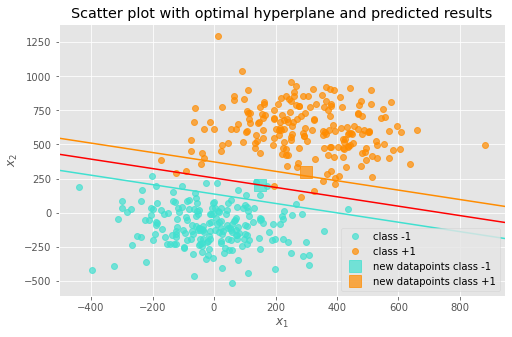

In [13]:
plt.figure(figsize=(8,5))
ax = plt.subplot()
ax.plot(X0[:, 0], X0[:, 1], 'o', color='turquoise', alpha=0.7, label='class -1')
ax.plot(X1[:, 0], X1[:, 1], 'o', color='darkorange', alpha=0.7, label='class +1')
ax.plot(X_new_0[:, 0], X_new_0[:, 1], 's', color='turquoise', alpha=0.7, markersize=12, label='new datapoints class -1')
ax.plot(X_new_1[:, 0], X_new_1[:, 1], 's', color='darkorange', alpha=0.7, markersize=12, label='new datapoints class +1')

x2_min, x2_max = ax.get_ybound()
x1_min = compute_x1(x2_min, weights, bias)
x1_max = compute_x1(x2_max, weights, bias)
x1_min_left = compute_x1_left(x2_min, weights, bias)
x1_max_left = compute_x1_left(x2_max, weights, bias)
x1_min_right = compute_x1_right(x2_min, weights, bias)
x1_max_right = compute_x1_right(x2_max, weights, bias)

center_line = mlines.Line2D([x1_min,x1_max], [x2_min, x2_max], color='red')
left_line = mlines.Line2D([x1_min_left,x1_max_left], [x2_min, x2_max], color='turquoise')
right_line = mlines.Line2D([x1_min_right,x1_max_right], [x2_min, x2_max], color='darkorange')
ax.add_line(center_line)
ax.add_line(left_line)
ax.add_line(right_line)
plt.title('Scatter plot with optimal hyperplane and predicted results')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend()
plt.show()